# There's a function for that!*
### Let's take a look at some of the wonderful functions provided in `hex_maze_utils.py`!
*If there isn't and you want one, bother me about it or write one and submit a pull request!

In [1]:
import pickle
import pandas as pd
import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

from hex_maze_utils import plot_hex_maze

### First load our databases so we have some good mazes to play with

In [2]:
# Load the maze configuration database as "maze_database"
maze_database = pd.read_pickle('../maze_configuration_database.pkl')
print(f"Here's our database of {len(maze_database)} hex mazes:")
display(maze_database.head())

# Load the dabatase of 1000 potential barrier sequences as "barrier_sequence_database"
barrier_sequence_database = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequences_first1000.pkl')
print(f"Here's our database of {len(barrier_sequence_database)} barrier sequences:")
display(barrier_sequence_database.head())

Here's our database of 55896 hex mazes:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."


Here's our database of 1000 barrier sequences:


,barrier_sequence,sequence_length,reward_path_lengths,choice_points
0,"[(37, 7, 39, 41, 14, 46, 20, 23, 30), (37, 39,...",5,"[[15, 17, 21], [15, 21, 19], [15, 17, 19], [23...","[{13}, {26}, {26, 13, 29}, {29}, {13}]"
1,"[(34, 36, 37, 39, 10, 45, 14, 15, 20), (34, 37...",6,"[[17, 21, 19], [19, 21, 17], [19, 15, 17], [17...","[{21}, {30}, {24}, {16, 24, 26}, {24}, {35}]"
2,"[(34, 7, 41, 11, 46, 17, 20, 28, 31)]",1,"[[23, 19, 17]]",[{35}]
3,"[(34, 10, 42, 12, 45, 18, 23, 25, 31), (34, 37...",6,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [21...","[{17}, {17, 26, 35}, {35}, {24}, {24, 17, 26},..."
4,"[(39, 9, 10, 46, 21, 22, 23, 26, 30)]",1,"[[23, 17, 17]]",[{29}]


# Rotating and reflecting a hex maze
So you have a barrier configuration, but it's not quite right. What if it were rotated 120 degrees? Or perhaps flipped across one of its axes of symmetry? 

This could be mildly annoying to do by hand, but never fear! There's a function for that!

In [3]:
from hex_maze_utils import get_rotated_barriers, get_reflected_barriers

# Look at the documentation for our rotation and reflection functions
help(get_rotated_barriers)
help(get_reflected_barriers)

Help on function get_rotated_barriers in module hex_maze_utils:

get_rotated_barriers(original_barriers, direction='counterclockwise')
    Given a set of barriers in the hex maze, returns the corresponding
    barrier set if the maze is rotated once counterclockwise (e.g. hex 1 becomes hex 2,
    4 becomes 49, etc.). Option to specify direction='clockwise' to rotate clockwise
    instead (e.g 1 becomes 3, 4 becomes 48, etc.)

    Args:
    original_barriers (set/frozenset): A set of barriers defining a hex maze
    direction (String): Which direction to rotate the maze ('clockwise' or 'counterclockwise')
    Defaults to 'counterclockwise'

    Returns:
    set: The barrier set if the maze was rotated once in the specified direction

Help on function get_reflected_barriers in module hex_maze_utils:

get_reflected_barriers(original_barriers, axis=1)
    Given a set of barriers in the hex maze, returns the corresponding
    barrier set if the maze is reflected along the axis of hex 1
    

Our starting maze is: {37, 39, 7, 41, 14, 46, 20, 23, 30}. It looks like this:


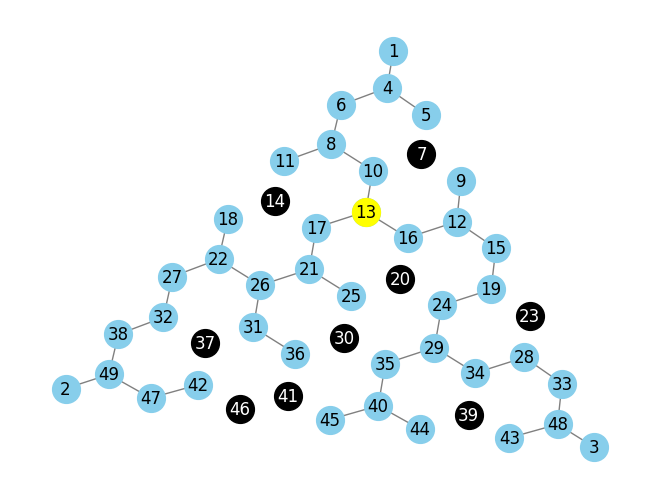

In [4]:
# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Plot the example maze
print(f"Our starting maze is: {example_maze}. It looks like this:")
plot_hex_maze(example_maze)

Here is our maze rotated 120 degrees counterclockwise: {32, 34, 7, 41, 11, 19, 20, 21, 23}


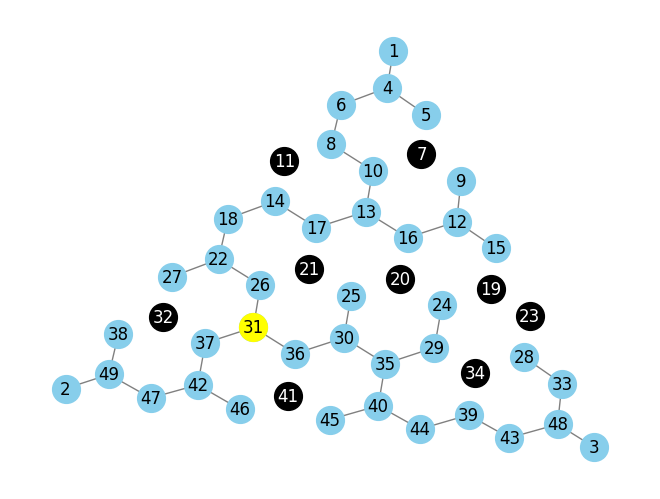

Here is our maze rotated 120 degrees clockwise: {32, 39, 10, 11, 14, 46, 19, 21, 30}


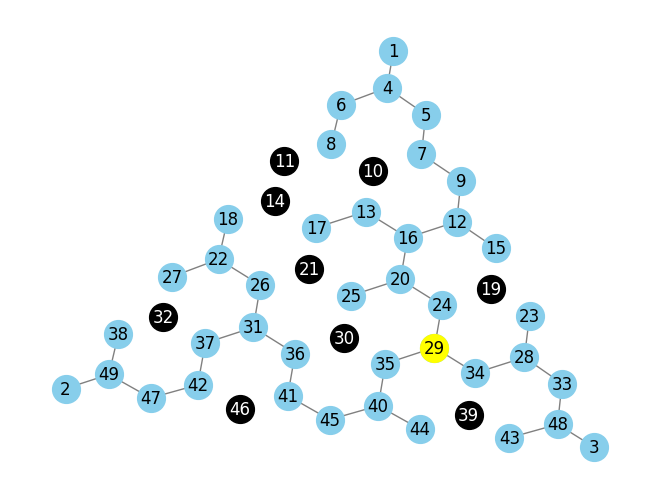

Here is our maze reflected across the axis of hex 1: {34, 8, 40, 42, 12, 44, 21, 27, 30}


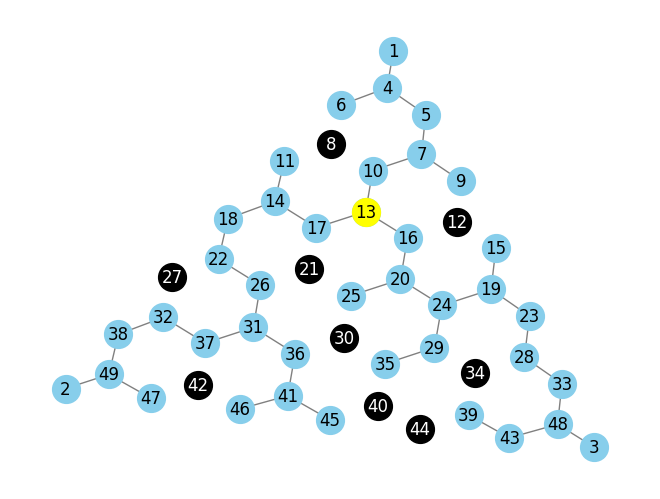

Here is our maze reflected across the axis of hex 2: {37, 8, 40, 9, 20, 21, 22, 27, 28}


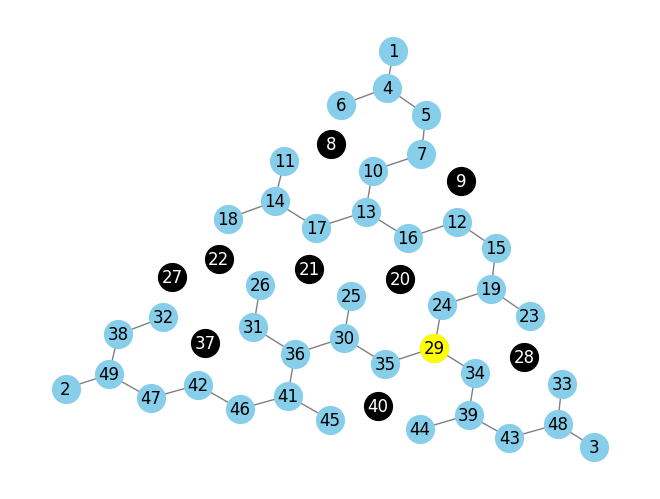

Here is our maze reflected across the axis of hex 3: {9, 10, 42, 12, 44, 20, 22, 28, 30}


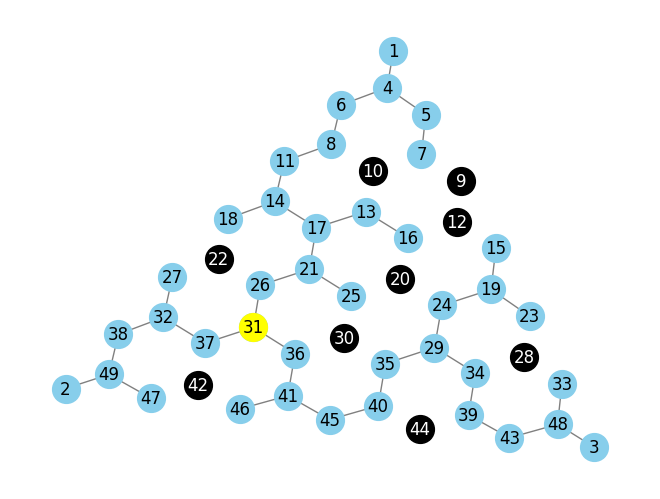

In [5]:
# Rotate the maze counterclockwise
rotated_maze_ccw = get_rotated_barriers(example_maze, direction='counterclockwise')
print(f"Here is our maze rotated 120 degrees counterclockwise: {rotated_maze_ccw}")
plot_hex_maze(rotated_maze_ccw)

# Rotate the maze clockwise
rotated_maze_cw = get_rotated_barriers(example_maze, direction='clockwise')
print(f"Here is our maze rotated 120 degrees clockwise: {rotated_maze_cw}")
plot_hex_maze(rotated_maze_cw)

# Reflect the maze across the axis of hex 1
reflected_maze_1 = get_reflected_barriers(example_maze, axis=1)
print(f"Here is our maze reflected across the axis of hex 1: {reflected_maze_1}")
plot_hex_maze(reflected_maze_1)

# Reflect the maze across the axis of hex 2
reflected_maze_2 = get_reflected_barriers(example_maze, axis=2)
print(f"Here is our maze reflected across the axis of hex 2: {reflected_maze_2}")
plot_hex_maze(reflected_maze_2)

# Reflect the maze across the axis of hex 3
reflected_maze_3 = get_reflected_barriers(example_maze, axis=3)
print(f"Here is our maze reflected across the axis of hex 3: {reflected_maze_3}")
plot_hex_maze(reflected_maze_3)

### Getting all rotations and reflections
The set of all rotated and/or reflected mazes for a given maze are known as mazes that are *isomorphic* to that maze. Instead of doing all possible rotations and reflections individually, we have a function to get all of them at once.

In [6]:
from hex_maze_utils import get_isomorphic_mazes

# View the documentation for this function
help(get_isomorphic_mazes)

Help on function get_isomorphic_mazes in module hex_maze_utils:

get_isomorphic_mazes(barriers)
    Given a set of barriers defining a hex maze configuration, return the
    other 5 barrier sets that have the same graph structure (corresponding
    to the maze rotated clockwise/counterclockwise and reflected across its
    3 axes of symmetry)

    Args:
    barriers (set/frozenset): A set of barriers defining a hex maze

    Returns:
    set of frozensets: a set of the 5 barrier sets defining mazes isomorphic
    to this maze



In [7]:
# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Get all mazes isomorphic to this maze
isomorphic_mazes = get_isomorphic_mazes(example_maze)
print(f"Our starting maze is: \n{example_maze}")
print("Here are the mazes isomorphic to this maze:")
print(*(maze for maze in isomorphic_mazes), sep='\n')

Our starting maze is: 
{37, 39, 7, 41, 14, 46, 20, 23, 30}
Here are the mazes isomorphic to this maze:
frozenset({37, 8, 40, 9, 20, 21, 22, 27, 28})
frozenset({32, 34, 7, 41, 11, 19, 20, 21, 23})
frozenset({34, 8, 40, 42, 12, 44, 21, 27, 30})
frozenset({32, 39, 10, 11, 14, 46, 19, 21, 30})
frozenset({9, 10, 42, 12, 44, 20, 22, 28, 30})


# Getting information about a hex maze

We have 2 options:
1. We can use the database to look up information about a hex maze
2. We can calculate information about a hex maze directly

### Using the database to look up info about a hex maze
If our hex maze exists in the database, a database lookup may be faster than recalculating info about the maze (although this only really becomes relevant if we're doing it many times). We can filter the database using the barrier set or use `df_lookup` to look up a specific attribute.

In [8]:
# Import our function for df lookup
from hex_maze_utils import df_lookup

# View the documentation for this function
help(df_lookup)

Help on function df_lookup in module hex_maze_utils:

df_lookup(df, barriers, attribute_name)
    Use the dataframe to look up a specified attribute of a barrier set.

    Args:
    df (DataFrame): The hex maze database
    barriers (set/frozenset): A set of barriers defining a hex maze
    attribute_name (String): The maze attribute to look up in the df.
    Must exist as a column in the df

    Returns:
    The value of the attribute for this maze



In [14]:
# Example hex maze
example_maze = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Use the database to look up the choice points for this maze
choice_points = df_lookup(maze_database, example_maze, 'choice_points')
print(f"The choice points for this maze are {choice_points}.")

# Use the database to look up the other mazes isomorphic to this maze
isomorphic_mazes = df_lookup(maze_database, example_maze, 'isomorphic_mazes')
print(f"\nThe isomorphic mazes for this maze are: \n{isomorphic_mazes}.")

# Get the row in the database that has all of the info for this maze
maze_info = maze_database[maze_database['barriers'] == example_maze]
print("\nHere is all of the info for this maze in our database:")
display(maze_info)

The choice points for this maze are {13}.

The isomorphic mazes for this maze are: 
{frozenset({32, 35, 8, 12, 44, 46, 16, np.int64(21), 23}), frozenset({39, 9, 42, 11, 17, 19, 24, 27, 30}), frozenset({36, 7, 44, 46, 14, 17, 20, 27, 28}), frozenset({35, 7, 40, 11, 46, 20, 26, 27, 28}), frozenset({39, 9, 42, 11, 16, 22, 23, 26, 30})}.

Here is all of the info for this maze in our database:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
5,"(32, 36, 8, 9, 41, 44, 21, 23, 24)",17,17,23,"[17, 17, 23]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, ...","[[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 1...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{13},1,"[[28, 33, 48, 43, 39, 34]]",1,"{(32, 35, 8, 12, 44, 46, 16, 21, 23), (39, 9, ..."


### Calculating information about a maze
If our hex maze isn't in the database, we can use `get_maze_attributes` to calculate a bunch of relevant information about it!

In [15]:
from hex_maze_utils import get_maze_attributes

# View the documentation for this function
help(get_maze_attributes)

Help on function get_maze_attributes in module hex_maze_utils:

get_maze_attributes(barrier_set)
    Given a set of barriers defining a maze, create a dictionary of attributes for that maze.
    Includes the length of the optimal paths between reward ports, the optimal paths
    between these ports, ther path length difference between optimal paths,
    critical choice points, the number of cycles and the hexes defining these cycles,
    and a set of other maze configurations isomorphic to this maze.

    Args:
    barrier_set (set/frozenset): A set of barriers defining a hex maze

    Returns:
    dict: A dictionary of attributes of this maze



In [17]:
# Example hex maze
example_maze = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Calculate and print info about this maze
maze_info = get_maze_attributes(example_maze)
for key in maze_info:
    print(f"{key}: {maze_info[key]}")

barriers: {32, 36, 8, 9, 41, 44, 21, 23, 24}
len12: 17
len13: 17
len23: 23
reward_path_lengths: [17, 17, 23]
path_length_difference: 6
optimal_paths_12: [[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, 37, 42, 47, 49, 2]]
optimal_paths_13: [[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
optimal_paths_23: [[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
optimal_paths_all: [[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, 37, 42, 47, 49, 2], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
choice_points: {13}
num_choice